In [88]:
import pandas as pd
from print_nanny_webapp.client_events.models import PredictEvent
from django.utils import timezone
from asgiref.sync import sync_to_async
import os

import matplotlib


In [99]:
predict_events = PredictEvent.objects.all().order_by('-dt').values_list('predict_data', flat=True)

df = pd.DataFrame.from_records(predict_events)
df.head()

,num_detections,detection_boxes,detection_scores,detection_classes
0,40.0,"[[0.2451682984828949, 0.4709167778491974, 0.64...","[0.12109375, 0.06640625, 0.03515625, 0.0351562...","[4, 4, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 1, 1, 4, ..."
1,40.0,"[[0.2529710829257965, 0.4709167778491974, 0.65...","[0.41796875, 0.02734375, 0.01953125, 0.0195312...","[5, 4, 4, 4, 1, 1, 1, 5, 1, 2, 4, 4, 1, 1, 4, ..."
2,40.0,"[[0.11536601185798645, 0.48306769132614136, 0....","[0.41796875, 0.06640625, 0.06640625, 0.0351562...","[4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 1, 1, 1, ..."
3,40.0,"[[0.2796875536441803, 0.4475083649158478, 0.64...","[0.16015625, 0.05078125, 0.03515625, 0.0351562...","[4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, ..."
4,40.0,"[[0.294384241104126, 0.49837902188301086, 0.60...","[0.08984375, 0.05078125, 0.02734375, 0.0273437...","[4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 3, ..."


In [102]:
df = df.dropna()
df = df[['detection_classes', 'detection_scores']]
df

,detection_classes,detection_scores
0,"[4, 4, 1, 1, 1, 1, 3, 1, 1, 4, 4, 1, 1, 1, 4, ...","[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
1,"[5, 4, 4, 4, 1, 1, 1, 5, 1, 2, 4, 4, 1, 1, 4, ...","[0.41796875, 0.02734375, 0.01953125, 0.0195312..."
2,"[4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 1, 1, 1, ...","[0.41796875, 0.06640625, 0.06640625, 0.0351562..."
3,"[4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, ...","[0.16015625, 0.05078125, 0.03515625, 0.0351562..."
4,"[4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 3, ...","[0.08984375, 0.05078125, 0.02734375, 0.0273437..."
...,...,...
111,"[4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, ...","[0.33984375, 0.16015625, 0.12109375, 0.0664062..."
112,"[4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.26953125, 0.2109375, 0.2109375, 0.12109375,..."
113,"[4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.41796875, 0.26953125, 0.16015625, 0.0664062..."
114,"[4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, ...","[0.26953125, 0.2109375, 0.16015625, 0.08984375..."


In [103]:
# expand array cells
df = df.explode('detection_classes')
df


,detection_classes,detection_scores
0,4,"[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
0,4,"[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
0,1,"[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
0,1,"[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
0,1,"[0.12109375, 0.06640625, 0.03515625, 0.0351562..."
...,...,...
115,1,"[0.26953125, 0.2109375, 0.12109375, 0.08984375..."
115,4,"[0.26953125, 0.2109375, 0.12109375, 0.08984375..."
115,4,"[0.26953125, 0.2109375, 0.12109375, 0.08984375..."
115,1,"[0.26953125, 0.2109375, 0.12109375, 0.08984375..."


In [104]:
df = df.explode('detection_scores')
df

,detection_classes,detection_scores
0,4,0.121094
0,4,0.0664062
0,4,0.0351562
0,4,0.0351562
0,4,0.0351562
...,...,...
115,4,0.0195312
115,4,0.0195312
115,4,0.0195312
115,4,0.0195312


In [149]:
CONFIDENCE_THRESHOLD = 0.5

LABELS = {
    1: 'nozzle',
    2: 'adhesion',
    3: 'spaghetti',
    4: 'print',
    5: 'raft',
}

FAILURES = [2, 3]


In [133]:
df = df[df['detection_scores'] > CONFIDENCE_THRESHOLD]
df

,detection_classes,detection_scores
24,2,0.660156
24,2,0.660156
24,2,0.660156
24,2,0.660156
24,1,0.660156
...,...,...
97,2,0.730469
97,1,0.730469
97,5,0.730469
97,3,0.730469


In [137]:
print(LABELS)
df.groupby('detection_classes').size()


{1: 'nozzle', 2: 'adhesion', 3: 'spaghetti', 4: 'print', 5: 'raft'}


detection_classes
1     57
2     52
3    142
4    215
5     94
dtype: int64

In [152]:
df[df['detection_classes'].isin(FAILURES)]

Detected failures


,detection_classes,detection_scores
24,2,0.660156
24,2,0.660156
24,2,0.660156
24,2,0.660156
24,2,0.660156
...,...,...
97,3,0.730469
97,3,0.730469
97,2,0.730469
97,2,0.730469


In [154]:
print('Frames where at least 1 failure was detected')
df[df['detection_classes'].isin(FAILURES)].index.unique()

Frames where at least 1 failure was detected


Int64Index([24, 32, 34, 37, 41, 56, 59, 71, 84, 85, 86, 92, 97], dtype='int64')

In [155]:
print('Frames where at least 1 print was detected')
df[df['detection_classes'] == 4].index.unique()

Frames where at least 1 print was detected


Int64Index([24, 32, 33, 34, 37, 41, 56, 59, 71, 84, 85, 86, 92, 97], dtype='int64')

In [205]:
df['detection_classes_display'] = df['detection_classes'].map(LABELS)

Distribution of confidence by class


array([[<AxesSubplot:title={'center':'adhesion'}>,
        <AxesSubplot:title={'center':'nozzle'}>],
       [<AxesSubplot:title={'center':'print'}>,
        <AxesSubplot:title={'center':'raft'}>],
       [<AxesSubplot:title={'center':'spaghetti'}>, <AxesSubplot:>]],
      dtype=object)

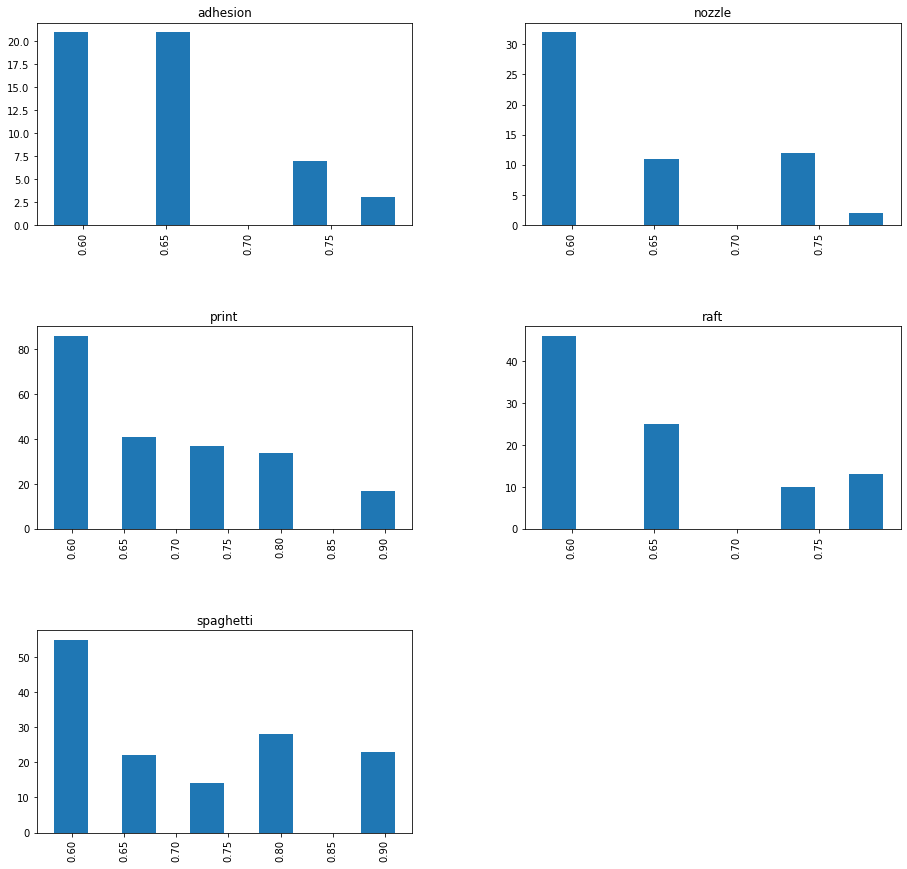

In [210]:
print('Distribution of confidence by class')
df['detection_scores'].hist(by=df['detection_classes_display'], figsize=(15,15))

In [256]:
print('Total failures normalized by frame count')
df[df['detection_classes'].isin(FAILURES)].groupby('detection_classes_display').count()['detection_classes'] / len(df.index.unique())
df

Total failures normalized by frame count


,detection_classes,detection_scores,detection_classes_display
24,2,0.660156,adhesion
24,2,0.660156,adhesion
24,2,0.660156,adhesion
24,2,0.660156,adhesion
24,1,0.660156,nozzle
...,...,...,...
97,2,0.730469,adhesion
97,1,0.730469,nozzle
97,5,0.730469,raft
97,3,0.730469,spaghetti


In [277]:
print('Per-frame rollup @todo figure out why agg fns not working on detection_score field')
df.groupby([df.index, 'detection_classes_display']).agg({ 'detection_classes': 'count'})

Visualize per frame


detection_classes
   detection_classes_display                   
24 adhesion                                  17
   nozzle                                     4
   print                                      6
   raft                                      10
   spaghetti                                  3
...                                         ...
97 adhesion                                   6
   nozzle                                     9
   print                                     19
   raft                                       3
   spaghetti                                  3

[61 rows x 1 columns]